In [5]:
import pandas as pd    

with open('/home/louis/Desktop/Energy/channel_1.dat','r') as f:
    next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)

print(df)


                   0    1
0         1352500101  582
1         1352500107  600
2         1352500113  586
3         1352500120  596
4         1352500132  581
5         1352500138  597
6         1352500144  592
7         1352500150  587
8         1352500156  574
9         1352500168  577
10        1352500175  581
11        1352500181  587
12        1352500199  577
13        1352500211  584
14        1352500218  587
15        1352500224  592
16        1352500230  587
17        1352500236  585
18        1352500242  583
19        1352500248  593
20        1352500255  583
21        1352500261  590
22        1352500267  582
23        1352500273  591
24        1352500279  597
25        1352500285  612
26        1352500291  587
27        1352500297  590
28        1352500304  579
29        1352500310  585
...              ...  ...
10239402  1420438369  203
10239403  1420438375  206
10239404  1420438381  203
10239405  1420438387  205
10239406  1420438393  202
10239407  1420438399  203
10239408  14

In [13]:
df = pd.read_csv('/home/louis/Desktop/Energy/channel_1.dat',delimiter = ',', sep='\s+', header=None, skiprows=1)
print(df)

                       0
0         1352500101 582
1         1352500107 600
2         1352500113 586
3         1352500120 596
4         1352500132 581
5         1352500138 597
6         1352500144 592
7         1352500150 587
8         1352500156 574
9         1352500168 577
10        1352500175 581
11        1352500181 587
12        1352500199 577
13        1352500211 584
14        1352500218 587
15        1352500224 592
16        1352500230 587
17        1352500236 585
18        1352500242 583
19        1352500248 593
20        1352500255 583
21        1352500261 590
22        1352500267 582
23        1352500273 591
24        1352500279 597
25        1352500285 612
26        1352500291 587
27        1352500297 590
28        1352500304 579
29        1352500310 585
...                  ...
10239402  1420438369 203
10239403  1420438375 206
10239404  1420438381 203
10239405  1420438387 205
10239406  1420438393 202
10239407  1420438399 203
10239408  1420438405 205
10239409  1420438411 203



# test program for concatenation

In [6]:
import glob
import pandas as pd

path =r'/home/louis/Desktop/Energy (copy)/' # use your path
allFiles = glob.glob(path + "/*.dat")
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_, delimiter = ' ', index_col=None, header=None)
    list_.append(df)

frame = pd.concat(list_, axis = 1  , ignore_index = True)
print(frame)

ValueError: No axis named 2 for object type <class 'type'>

In [3]:
import glob
import pandas as pd

path =r'/home/louis/Desktop/Energy (copy)/' # use your path
allFiles = glob.glob(path + "/*.dat")

list_ = []
appl = ['heater','kettle','microwave', 'pop']
i = 0
for file_ in allFiles:
    headers = ['TS', appl[i]]
    df = pd.read_csv(file_, delimiter = ' ', index_col=None, names=headers )  
    list_.append(df)
    i = i+1
    
frame = pd.concat(list_, axis = 1, ignore_index = None)
print(frame)


           TS  heater          TS  kettle          TS  microwave  \
0  1352500098      10  1352500098       1  1352500098          1   
1  1352500104      20  1352500104       2  1352500104          2   
2  1352500110      30  1352500110       3  1352500110          3   
3  1352500116      40  1352500116       4  1352500116          0   
4  1352500122       0  1352500122       5  1352500122          0   
5  1352500128       0  1352500128       6  1352500128          0   
6  1352500134       0  1352500134       7  1352500134          0   
7  1352500140       0  1352500140       8  1352500140          0   
8  1352500146      80  1352500146       9  1352500146          9   

             TS    pop  
0  1.352500e+09  100.0  
1  1.352500e+09  200.0  
2  1.352500e+09  300.0  
3  1.352500e+09  400.0  
4  1.352500e+09  500.0  
5  1.352500e+09  600.0  
6           NaN    NaN  
7           NaN    NaN  
8           NaN    NaN  


# Data Processing

In [197]:
import pandas as pd
df1 = pd.read_csv('/home/louis/Desktop/Energy (copy)/channel_1.dat',delimiter = ' ', sep='\s+', names = ['TS','Kettle'])
df2 = pd.read_csv('/home/louis/Desktop/Energy (copy)/channel_5.dat', delimiter = ' ', index_col=None, names = ['TS','Microwave'])  
df3 = pd.read_csv('/home/louis/Desktop/Energy (copy)/channel_6.dat', delimiter = ' ', index_col=None, names = ['TS','Lpatop'])  
df4 = pd.read_csv('/home/louis/Desktop/Energy (copy)/channel_8.dat', delimiter = ' ', index_col=None, names = ['TS','TV'])  


In [204]:
#frame1 = df1.set_index('TS').join(df2.set_index('TS'))
frame1 = df1.join(df2.set_index('TS'), on='TS').join(df3.set_index('TS'), on='TS').join(df4.set_index('TS'), on='TS')
#frame2 = frame1.join(df3.set_index('TS'), on='TS')
#frame1 = df1.join(df4.set_index('TS'), on='TS')


print(frame1)

           TS  Kettle  Microwave  Lpatop  TV
0  1352500098      10      100.0       0   1
1  1352500104      20      200.0       0   2
2  1352500110      30        NaN       0   3
3  1352500116      40      400.0       0   0
4  1352500122       0      500.0       0   0
5  1352500128       0      600.0       0   0
6  1352500134       0        NaN       0   0
7  1352500140       0        NaN       0   0
8  1352500146      80        NaN       0   9


In [4]:
import glob
import pandas as pd
df1 = pd.read_csv('/home/louis/Desktop/Energy (copy)/channel_1.dat',delimiter = ' ', sep='\s+', names = ['TS','Kettle'])
df2 = pd.read_csv('/home/louis/Desktop/Energy (copy)/channel_5.dat', delimiter = ' ', index_col=None, names = ['TS','Microwave'])  

path =r'/home/louis/Desktop/Energy (copy)/' # use your path
allFiles = glob.glob(path + "/*.dat")
appliances = ['Kettle', 'Microwave', 'Lpatop', 'TV']
i = 0
frame1 = pd.DataFrame(columns=['TS']) 

for file_ in allFiles:
    df = pd.read_csv(file_,delimiter = ' ', names = ['TS', appliances[i]])
    #frame1 = df.join(df.set_index('TS'), on='TS')
    frame1 = frame1.merge(df, on='TS', how='outer', sort =True) 
    i = i+1
    
#rame1 = df1.set_index('TS').join(df2.set_index('TS'))
    
    
print(frame1)
#print(frame1)

           TS  Kettle  Microwave  Lpatop     TV
0  1352500098    10.0        1.0     1.0  100.0
1  1352500104    20.0        2.0     2.0  200.0
2  1352500110    30.0        3.0     3.0    NaN
3  1352500114     NaN        NaN     NaN  300.0
4  1352500116    40.0        4.0     0.0  400.0
5  1352500122     0.0        5.0     0.0  500.0
6  1352500128     0.0        6.0     0.0  600.0
7  1352500134     0.0        7.0     0.0    NaN
8  1352500140     0.0        8.0     0.0    NaN
9  1352500146    80.0        9.0     9.0    NaN


# End

In [ ]:

list_.append(df2)

In [30]:
frame1 = frame.fillna(method='ffill')
print(frame1)

               0             1             2
0  1352500104 20  1352500104 0  1352500104 2
1  1352500110 30  1352500110 0  1352500110 3
2  1352500116 40  1352500116 0  1352500116 4
3   1352500122 0  1352500122 0  1352500122 5
4   1352500128 0  1352500128 0  1352500128 6
5   1352500134 0  1352500134 0  1352500128 6
6   1352500140 0  1352500140 0  1352500128 6
7  1352500146 80  1352500146 0  1352500128 6


In [11]:
frame2 = frame.fillna(0)
print(frame2)

               0    1             2    3             4    5
0  1352500098 10  0.0  1352500098 0  0.0  1352500098 1  0.0
1  1352500104 20  0.0  1352500104 0  0.0  1352500104 2  0.0
2  1352500110 30  0.0  1352500110 0  0.0  1352500110 3  0.0
3  1352500116 40  0.0  1352500116 0  0.0  1352500116 4  0.0
4   1352500122 0  0.0  1352500122 0  0.0  1352500122 5  0.0
5   1352500128 0  0.0  1352500128 0  0.0  1352500128 6  0.0
6   1352500134 0  0.0  1352500134 0  0.0             0  0.0
7   1352500140 0  0.0  1352500140 0  0.0             0  0.0
8  1352500146 80  0.0  1352500146 0  0.0             0  0.0


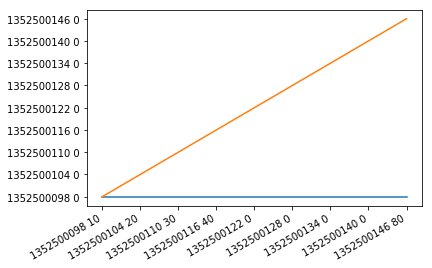

In [33]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#f['Date'] = df['Date'].map(lambda x: datetime.strptime(str(x), '%Y/%m/%d %H:%M:%S.%f'))
x = frame2[0]
y = frame2[1]
z = frame2[2]

# plot
plt.plot(x,y,z)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()


# Actual Concatenation of 6 channels

In [7]:
import glob
import pandas as pd

path =r'/home/louis/Desktop/Energy/' # use your path
allFiles = glob.glob(path + "/*.dat")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None)
    list_.append(df)

cframe = pd.concat(list_, axis = 1, ignore_index = True)

In [8]:
print(cframe)

                     0               1             2             3  \
0         1352500098 1  1352500095 599  1352500098 1  1355523693 1   
1         1352500104 1  1352500101 582  1352500104 1  1355523699 1   
2         1352500110 1  1352500107 600  1352500110 1  1355523705 1   
3         1352500116 1  1352500113 586  1352500116 1  1355523711 1   
4         1352500122 1  1352500120 596  1352500122 1  1355523717 1   
5         1352500128 1  1352500132 581  1352500128 1  1355523723 1   
6         1352500134 1  1352500138 597  1352500134 1  1355523729 1   
7         1352500140 1  1352500144 592  1352500140 1  1355523735 1   
8         1352500146 1  1352500150 587  1352500146 1  1355523741 1   
9         1352500152 1  1352500156 574  1352500152 1  1355523747 1   
10        1352500158 1  1352500168 577  1352500158 1  1355523754 1   
11        1352500164 1  1352500175 581  1352500164 1  1355523760 1   
12        1352500170 1  1352500181 587  1352500170 1  1355523766 1   
13        1352500176

In [9]:
cframe.fillna(method='ffill')

,0,1,2,3,4,5
0,1352500098 1,1352500095 599,1352500098 1,1355523693 1,1355523692 85,1352500098 0
1,1352500104 1,1352500101 582,1352500104 1,1355523699 1,1355523698 85,1352500104 0
2,1352500110 1,1352500107 600,1352500110 1,1355523705 1,1355523704 84,1352500110 0
3,1352500116 1,1352500113 586,1352500116 1,1355523711 1,1355523710 85,1352500116 0
4,1352500122 1,1352500120 596,1352500122 1,1355523717 1,1355523716 85,1352500122 0
5,1352500128 1,1352500132 581,1352500128 1,1355523723 1,1355523722 85,1352500128 0
6,1352500134 1,1352500138 597,1352500134 1,1355523729 1,1355523728 85,1352500134 0
7,1352500140 1,1352500144 592,1352500140 1,1355523735 1,1355523734 85,1352500140 0
8,1352500146 1,1352500150 587,1352500146 1,1355523741 1,1355523740 85,1352500146 0
9,1352500152 1,1352500156 574,1352500152 1,1355523747 1,1355523746 86,1352500152 0


In [12]:
cframe.fillna(0)

MemoryError: 

In [ ]:
import glob
import pandas as pd

path =r'/home/louis/Desktop/Energy (copy)/' # use your path
allFiles = glob.glob(path + "/*.dat")

list_ = []
appl = ['heater','kettle','microwave', 'pop']
i = 0
for file_ in allFiles:
    headers = ['TS', appl[i]]
    df = pd.read_csv(file_, delimiter = ' ', index_col=None, names=headers)  
    list_.append(df)
    i = i+1
    
frame = pd.concat(list_, axis = 1, ignore_index = None)
print(frame)
